First, import the file.

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
tcga = pd.read_csv("TCGA_all_tidy_with_metadata.csv")

Next, remove the first two columns.

In [ ]:
tcga_new = tcga.iloc[:, 1:]
tcga_new.head()

Now, filter out the non-cancer types.

In [ ]:
bad = ['Solid Tissue Normal', 'Recurrent Tumor', 'Additional - New Primary', 'Additional Metastatic']
tcga_clean = tcga_new[~tcga_new.sample_type.isin(bad)]

Now select your cancer type only. If you want to have all of the cancer types, you can skip this cell.

In [ ]:
brca = tcga_clean[tcga_clean['Type'] == 'BRCA']
brca.head()

Now, we have our clean file, we can graph. Change X and Y to the genes that you want.

Cor value is 0.378


Text(33.37500000000001, 0.5, 'ASS1')

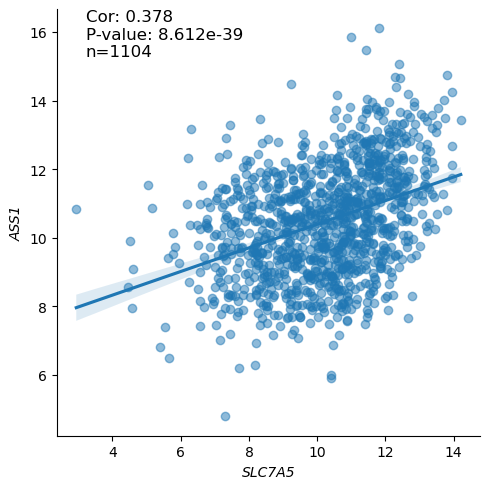

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
x = 'SLC7A5'
y = 'ASS1'
x20 = brca[x].max() / 5
y80 = brca[x].max() * 0.95
cor = brca[x].corr(brca[y])
cor = round(cor, 3)
print("Cor value is", round(cor, 3))
fgrid = sns.lmplot(x="ASS1", y="SLC7A5", data=brca, scatter_kws={"alpha":0.5})
ax = fgrid.axes[0,0]
_, p_value = pearsonr(brca[x], brca[y])
p_value_formatted = format(p_value, '.3e')
ax.text(x20, y80, f"Cor: {cor}\nP-value: {p_value_formatted}\nn={len(brca)}", fontsize=12)
ax.set_xlabel(f"{x}", fontstyle='italic')
ax.set_ylabel(f"{y}", fontstyle='italic')

